In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

## Model building

### Model training

In [2]:
dataset = pd.read_csv('/Users/yeqinghua/Documents/dsp-dataset/house price/train.csv')
dataset.sample(n=6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
864,865,20,FV,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,New,Partial,250580
684,685,60,RL,58.0,16770,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,221000
833,834,20,RL,100.0,10004,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,167000
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000
146,147,30,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,105000
411,412,190,RL,100.0,34650,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,1,2006,WD,Normal,145000


In [3]:
choose_features = dataset[['SalePrice', 'OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea', 'LotShape', 'SaleCondition']]
y = choose_features['SalePrice']
X = choose_features.drop('SalePrice', axis=1)

In [4]:
dataset['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .7)

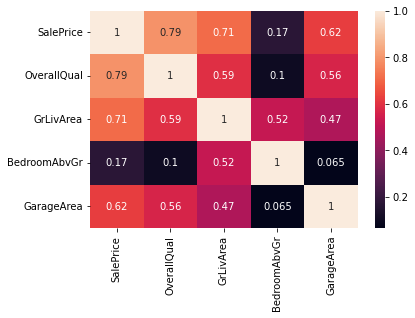

In [6]:
import seaborn as sns
_ = sns.heatmap(choose_features.corr(), annot=True)

In [7]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X_train['SaleCondition'] = ordinal_encoder.fit_transform(X_train[['SaleCondition']])
X_train.head(6)

/var/folders/wz/ygjs9w1x62gf_dfw1fscy5w40000gn/T/ipykernel_5609/2949026625.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['SaleCondition'] = ordinal_encoder.fit_transform(X_train[['SaleCondition']])


,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,LotShape,SaleCondition
718,7,2418,3,983,Reg,4.0
1362,4,1738,4,368,IR1,4.0
165,5,1355,4,0,Reg,4.0
491,6,1578,3,240,Reg,4.0
755,6,1471,3,440,Reg,4.0
507,6,1218,2,676,IR1,5.0


In [8]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', dtype=int, sparse=False)
encoder.fit(X_train['LotShape'].values.reshape(-1,1))

OneHotEncoder(dtype=<class 'int'>, sparse=False)

In [9]:
encoder.categories_

[array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object)]

In [10]:
encoded_lotShape = encoder.fit_transform(X_train['LotShape'].values.reshape(-1,1))
encoded_lotShape

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [11]:
encoded_lotShape_columns = encoder.get_feature_names(X_train[['LotShape']].columns)
encoded_lotShape_columns

array(['LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg'],
      dtype=object)

In [12]:
encoded_lotShape_df = pd.DataFrame(data=encoded_lotShape, columns=encoded_lotShape_columns, index=X_train[['LotShape']].index)
encoded_lotShape_df.head(5)

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
718,0,0,0,1
1362,1,0,0,0
165,0,0,0,1
491,0,0,0,1
755,0,0,0,1


In [13]:
X_train = X_train.copy().join(encoded_lotShape_df)
X_train.head(5)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,LotShape,SaleCondition,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
718,7,2418,3,983,Reg,4.0,0,0,0,1
1362,4,1738,4,368,IR1,4.0,1,0,0,0
165,5,1355,4,0,Reg,4.0,0,0,0,1
491,6,1578,3,240,Reg,4.0,0,0,0,1
755,6,1471,3,440,Reg,4.0,0,0,0,1


In [14]:
X_train= X_train.drop('LotShape', axis=1)
X_train.head(5)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,SaleCondition,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
718,7,2418,3,983,4.0,0,0,0,1
1362,4,1738,4,368,4.0,1,0,0,0
165,5,1355,4,0,4.0,0,0,0,1
491,6,1578,3,240,4.0,0,0,0,1
755,6,1471,3,440,4.0,0,0,0,1


In [15]:
features_to_scale = [ 'OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea']
X_train[features_to_scale].head(6)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea
718,7,2418,3,983
1362,4,1738,4,368
165,5,1355,4,0
491,6,1578,3,240
755,6,1471,3,440
507,6,1218,2,676


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train.loc[:,features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_train.head(6)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,SaleCondition,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
718,0.658378,1.578436,0.101885,2.313251,4.0,0,0,0,1
1362,-1.526240,0.328379,1.341490,-0.546687,4.0,1,0,0,0
165,-0.798034,-0.375697,1.341490,-2.258000,4.0,0,0,0,1
491,-0.069828,0.034248,0.101885,-1.141926,4.0,0,0,0,1
755,-0.069828,-0.162452,0.101885,-0.211865,4.0,0,0,0,1
507,-0.069828,-0.627547,-1.137720,0.885607,5.0,1,0,0,0


In [17]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model

SVC(kernel='linear')

In [18]:
model.fit(X_train, y_train)

SVC(kernel='linear')

### Model evaluation

In [19]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X_test['SaleCondition'] = ordinal_encoder.fit_transform(X_test[['SaleCondition']])
X_test.head(6)

/var/folders/wz/ygjs9w1x62gf_dfw1fscy5w40000gn/T/ipykernel_5609/578860578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['SaleCondition'] = ordinal_encoder.fit_transform(X_test[['SaleCondition']])


,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,LotShape,SaleCondition
1099,7,1601,3,478,IR1,0.0
45,9,1752,2,576,Reg,4.0
1107,7,2021,3,422,IR3,5.0
822,7,1733,3,433,IR1,3.0
1252,5,874,3,288,Reg,4.0
291,5,1716,6,0,Reg,4.0


In [20]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', dtype=int, sparse=False)
encoder.fit(X_test['LotShape'].values.reshape(-1,1))

OneHotEncoder(dtype=<class 'int'>, sparse=False)

In [21]:
encoded_lotShape_test = encoder.fit_transform(X_test['LotShape'].values.reshape(-1,1))
encoded_lotShape_test

array([[1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])

In [22]:
encoded_lotShape_columns_test = encoder.get_feature_names(X_test[['LotShape']].columns)
encoded_lotShape_columns_test

array(['LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg'],
      dtype=object)

In [23]:
encoded_lotShape_df_test = pd.DataFrame(data=encoded_lotShape_test, columns=encoded_lotShape_columns_test, index=X_test[['LotShape']].index)
encoded_lotShape_df_test.head(5)

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
1099,1,0,0,0
45,0,0,0,1
1107,0,0,1,0
822,1,0,0,0
1252,0,0,0,1


In [24]:
X_test = X_test.copy().join(encoded_lotShape_df_test)
X_test.head(5)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,LotShape,SaleCondition,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
1099,7,1601,3,478,IR1,0.0,1,0,0,0
45,9,1752,2,576,Reg,4.0,0,0,0,1
1107,7,2021,3,422,IR3,5.0,0,0,1,0
822,7,1733,3,433,IR1,3.0,1,0,0,0
1252,5,874,3,288,Reg,4.0,0,0,0,1


In [25]:
X_test= X_test.drop('LotShape', axis=1)
X_test.head(5)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,SaleCondition,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
1099,7,1601,3,478,0.0,1,0,0,0
45,9,1752,2,576,4.0,0,0,0,1
1107,7,2021,3,422,5.0,0,0,1,0
822,7,1733,3,433,3.0,1,0,0,0
1252,5,874,3,288,4.0,0,0,0,1


In [26]:
features_to_scale_test = [ 'OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea']
X_test[features_to_scale_test].head(6)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea
1099,7,1601,3,478
45,9,1752,2,576
1107,7,2021,3,422
822,7,1733,3,433
1252,5,874,3,288
291,5,1716,6,0


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_test.loc[:,features_to_scale_test] = scaler.fit_transform(X_test[features_to_scale_test])
X_test.head(6)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,SaleCondition,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
1099,0.648561,0.202255,0.190134,0.048891,0.0,1,0,0,0
45,2.091062,0.494920,-1.031986,0.509112,4.0,0,0,0,1
1107,0.648561,1.016291,0.190134,-0.214092,5.0,0,0,1,0
822,0.648561,0.458095,0.190134,-0.162435,3.0,1,0,0,0
1252,-0.793940,-1.206801,0.190134,-0.843374,4.0,0,0,0,1
291,-0.793940,0.425146,3.856494,-2.195860,4.0,0,0,0,1


In [28]:
model.fit(X_test, y_test)

SVC(kernel='linear')

In [29]:
y_pred = model.predict(X_test)
y_pred

array([190000, 319900, 274725, ..., 155000, 215000, 135000])

In [30]:
from sklearn.metrics import mean_squared_log_error

def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)
compute_rmsle(y_test, y_pred)

0.18

## Model inference

In [31]:
df = pd.read_csv('/Users/yeqinghua/Documents/dsp-dataset/house price/test.csv')
df.sample(n=6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
467,1928,20,RL,83.0,13383,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal
363,1824,30,RL,NaN,6615,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdWo,NaN,0,9,2009,WD,Normal
212,1673,60,RL,96.0,13262,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
448,1909,160,RM,24.0,1488,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,10,2009,WD,Normal
1260,2721,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
557,2018,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,400,8,2008,WD,Normal


In [32]:
inference_data = df[['OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea', 'LotShape', 'SaleCondition']]
inference_data.head(5)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,LotShape,SaleCondition
0,5,896,2,730.0,Reg,Normal
1,6,1329,3,312.0,IR1,Normal
2,5,1629,3,482.0,IR1,Normal
3,6,1604,3,470.0,IR1,Normal
4,8,1280,2,506.0,IR1,Normal


In [33]:
inference_data.isnull().sum()

OverallQual      0
GrLivArea        0
BedroomAbvGr     0
GarageArea       1
LotShape         0
SaleCondition    0
dtype: int64

In [34]:
inference_data = inference_data.dropna(axis=0, how='any')

In [35]:
inference_data.isnull().sum()

OverallQual      0
GrLivArea        0
BedroomAbvGr     0
GarageArea       0
LotShape         0
SaleCondition    0
dtype: int64

In [36]:
inference_data_to_encode = inference_data[['OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea', 'LotShape', 'SaleCondition']]
inference_data_to_scale = inference_data[['OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea', 'LotShape', 'SaleCondition']]

In [37]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
inference_data['SaleCondition'] = ordinal_encoder.fit_transform(inference_data[['SaleCondition']])
inference_data.head(6)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,LotShape,SaleCondition
0,5,896,2,730.0,Reg,4.0
1,6,1329,3,312.0,IR1,4.0
2,5,1629,3,482.0,IR1,4.0
3,6,1604,3,470.0,IR1,4.0
4,8,1280,2,506.0,IR1,4.0
5,6,1655,3,440.0,IR1,4.0


In [38]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(handle_unknown='error', dtype=int, sparse=False)
one_hot_encoder.fit(inference_data['LotShape'].values.reshape(-1,1))

OneHotEncoder(dtype=<class 'int'>, sparse=False)

In [39]:
encoded_lotShape_inference = encoder.fit_transform(inference_data['LotShape'].values.reshape(-1,1))
encoded_lotShape_inference

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [40]:
encoded_lotShape_columns_inference = encoder.get_feature_names(inference_data[['LotShape']].columns)
encoded_lotShape_columns_inference

array(['LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg'],
      dtype=object)

In [41]:
encoded_lotShape_df_inference = pd.DataFrame(data=encoded_lotShape_inference, columns=encoded_lotShape_columns_inference, index=inference_data[['LotShape']].index)
encoded_lotShape_df_inference.head(5)

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [42]:
inference_data = inference_data.copy().join(encoded_lotShape_df_inference)
inference_data.head(5)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,LotShape,SaleCondition,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,5,896,2,730.0,Reg,4.0,0,0,0,1
1,6,1329,3,312.0,IR1,4.0,1,0,0,0
2,5,1629,3,482.0,IR1,4.0,1,0,0,0
3,6,1604,3,470.0,IR1,4.0,1,0,0,0
4,8,1280,2,506.0,IR1,4.0,1,0,0,0


In [43]:
inference_data= inference_data.drop('LotShape', axis=1)
inference_data.head(5)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,SaleCondition,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,5,896,2,730.0,4.0,0,0,0,1
1,6,1329,3,312.0,4.0,1,0,0,0
2,5,1629,3,482.0,4.0,1,0,0,0
3,6,1604,3,470.0,4.0,1,0,0,0
4,8,1280,2,506.0,4.0,1,0,0,0


In [44]:
features_to_scale_inference = [ 'OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea']
inference_data[features_to_scale_inference].head(6)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea
0,5,896,2,730.0
1,6,1329,3,312.0
2,5,1629,3,482.0
3,6,1604,3,470.0
4,8,1280,2,506.0
5,6,1655,3,440.0


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
inference_data.loc[:,features_to_scale_inference] = scaler.fit_transform(inference_data[features_to_scale_inference])
inference_data.head(6)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,SaleCondition,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,-0.751504,-1.214895,-1.029080,1.185538,4.0,0,0,0,1
1,-0.055384,-0.323000,0.176059,-0.740959,4.0,1,0,0,0
2,-0.751504,0.294940,0.176059,0.042545,4.0,1,0,0,0
3,-0.055384,0.243445,0.176059,-0.012761,4.0,1,0,0,0
4,1.336856,-0.423931,-1.029080,0.153157,4.0,1,0,0,0
5,-0.055384,0.348495,0.176059,-0.151027,4.0,1,0,0,0


In [46]:
y_pred_inference = model.predict(inference_data)
y_pred_inference

array([147000, 160000, 175000, ..., 137500, 115000, 260000])

## object persistance

### Persist the trained model

In [47]:
import joblib
#svc model
joblib.dump(model, '/Users/yeqinghua/Github/dsp-Qinghua-YE/models/model.joblib', compress=0, protocol=None, cache_size=None)
svc_model = joblib.load('/Users/yeqinghua/Github/dsp-Qinghua-YE/models/model.joblib', mmap_mode=None)
svc_model

SVC(kernel='linear')

### Persist the encoders and scalers

In [48]:
#ordinalEncoder
joblib.dump(ordinal_encoder, '/Users/yeqinghua/Github/dsp-Qinghua-YE/models/ordinal_encoder.joblib', compress=0, protocol=None, cache_size=None)
ordinalEncoder = joblib.load('/Users/yeqinghua/Github/dsp-Qinghua-YE/models/ordinal_encoder.joblib', mmap_mode=None)
ordinalEncoder

OrdinalEncoder()

In [49]:
#oneHotEncoder
joblib.dump(one_hot_encoder, '/Users/yeqinghua/Github/dsp-Qinghua-YE/models/one_hot_encoder.joblib', compress=0, protocol=None, cache_size=None)
oneHotEncoder = joblib.load('/Users/yeqinghua/Github/dsp-Qinghua-YE/models/one_hot_encoder.joblib', mmap_mode=None)
oneHotEncoder

OneHotEncoder(dtype=<class 'int'>, sparse=False)

In [50]:
#scalar
joblib.dump(scaler, '/Users/yeqinghua/Github/dsp-Qinghua-YE/models/scaler.joblib', compress=0, protocol=None, cache_size=None)
Scaler = joblib.load('/Users/yeqinghua/Github/dsp-Qinghua-YE/models/scaler.joblib', mmap_mode=None)
Scaler

StandardScaler()

## code refactoring

In [107]:
def read_dataset(file_path):
    dataset = pd.read_csv(file_path)
    df=dataset.copy()
    return df
df = read_dataset('/Users/yeqinghua/Documents/dsp-dataset/house price/train.csv')

In [108]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [88]:
def get_train_test_sets(df):
    df = df[['SalePrice', 'OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea', 'LotShape', 'SaleCondition']]
    y = df['SalePrice'].values.reshape(-1,1)
    X = df.drop('SalePrice', axis=1)
    X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.25)
    return X_train, y_train, X_test, y_test

In [89]:
X_train, y_train, X_test, y_test = get_train_test_sets(df)

In [109]:
y_train

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,LotShape,SaleCondition
320,9,2596,4,840,Reg,Partial
219,7,1248,2,438,Reg,Partial
401,7,1310,3,400,IR1,Partial
461,7,1135,3,576,Reg,Normal
879,5,864,3,336,IR1,Normal
...,...,...,...,...,...,...
922,6,1316,3,397,Reg,Partial
872,5,910,3,414,Reg,Normal
1369,8,1668,3,502,IR2,Normal
1180,7,2514,4,693,IR2,Normal


In [90]:
def ordinal_encode_data(df):
    X_train,y_train,X_test,y_test = get_train_test_sets(df)
    ordinal_encoder = OrdinalEncoder()
    X_train['SaleCondition'] = ordinal_encoder.fit_transform(X_train[['SaleCondition']])
#     encoder = OneHotEncoder()
#     encoded_train_df = encoder.fit_transform(X_train['LotShape'])
#     encoded_lotShape_columns = encoder.get_feature_names(X_train[['LotShape']].columns)
#     encoded_lotShape_df = pd.DataFrame(data=encoded_train_df, columns=encoded_lotShape_columns, index=X_train[['LotShape']].index)
#     X_train = X_train.copy().join(encoded_lotShape_df)
#     X_train= X_train.drop('LotShape', axis=1)
    return X_train

In [91]:
ordinal_encode_data(df)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,LotShape,SaleCondition
1320,6,1478,3,442,Reg,4.0
664,8,2097,1,1134,IR2,5.0
762,7,1547,3,614,Reg,4.0
423,8,2630,4,696,Reg,4.0
739,7,1728,3,572,IR1,4.0
...,...,...,...,...,...,...
1024,8,2898,2,665,IR1,0.0
464,5,1040,3,0,Reg,4.0
191,7,1479,4,484,IR1,4.0
145,6,1709,3,380,Reg,4.0


In [92]:
def one_hot_encode_data(df):
    X_train,y_train,X_test,y_test = get_train_test_sets(df)
    ordinal_encoder = OrdinalEncoder()
    X_train['SaleCondition'] = ordinal_encoder.fit_transform(X_train[['SaleCondition']])
    encoder = OneHotEncoder(handle_unknown = 'error', dtype=int, sparse=False)
    encoder.fit(X_train['LotShape'].values.reshape(-1, 1))
    encoded_lotShape = encoder.fit_transform(X_train['LotShape'].values.reshape(-1, 1))
    encoded_lotShape_columns = encoder.get_feature_names(X_train[['LotShape']].columns)
    encoded_lotShape_df = pd.DataFrame(data=encoded_lotShape, columns=encoded_lotShape_columns, index=X_train[['LotShape']].index)
    X_train = X_train.copy().join(encoded_lotShape_df)
    X_train= X_train.drop('LotShape', axis=1)
    return X_train

In [93]:
trained_encoded_data = one_hot_encode_data(df)

In [94]:
trained_encoded_data

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,SaleCondition,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
5,5,1362,1,480,4.0,1,0,0,0
1105,8,2622,3,712,4.0,1,0,0,0
975,7,1382,3,490,4.0,0,0,0,1
735,7,1768,2,320,4.0,0,0,0,1
52,5,816,2,516,4.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
470,8,1502,1,528,4.0,1,0,0,0
837,6,987,2,264,4.0,0,0,0,1
1175,8,2872,4,541,4.0,0,0,0,1
392,5,882,3,294,4.0,1,0,0,0


In [95]:
def scale_data(df):
    #X_train,y_train,X_test,y_test = get_train_test_sets(df)
    columns_to_scale = ['OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea']
    scaler = StandardScaler()
    scaled_train_df = scaler.fit_transform(df[columns_to_scale])
    return scaled_train_df

In [96]:
X_train = scale_data(trained_encoded_data)

In [97]:
# def model_training(path):
#     X_train, y_train, X_test, y_test = train_test_split(df, test_size = 0.25)
#     X_train = preprocess_data(X_train)
#     model = train_model(X_train, y_train)
#     metrics = evaluate_model(y_test, y_pred)
#     return model, metrics

In [104]:
def train_model(X, y):
    Model= model.fit(X, y)
    return Model


In [106]:
train_model(X_train, y_train)

ValueError: y should be a 1d array, got an array of shape (365, 6) instead.

In [ ]:
Save the different encoder and scaler objects in the models folder

In the Model inference section, instead of using the encoder and scaler instances that you already have in memory, load them from the models folder

In [ ]:
def build_model(data: pd.DataFrame) -> dict[str, str]:
    # Returns a dictionary with the model performances (for example {'rmse': 0.18})
    pass

In [ ]:

def make_predictions(input_data: pd.DataFrame) -> np.ndarray:
    # the model and all the data preparation objects (encoder, etc) should be loaded from the models folder
    pass

## Model inference